In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rng = np.random.RandomState(42)
mat_1 = rng.rand(2,2)
mat_2 = rng.randn(2,200)
mat_1

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848]])

In [4]:
mat_2

array([[-0.23415337, -0.23413696,  1.57921282,  0.76743473, -0.46947439,
         0.54256004, -0.46341769, -0.46572975,  0.24196227, -1.91328024,
        -1.72491783, -0.56228753, -1.01283112,  0.31424733, -0.90802408,
        -1.4123037 ,  1.46564877, -0.2257763 ,  0.0675282 , -1.42474819,
        -0.54438272,  0.11092259, -1.15099358,  0.37569802, -0.60063869,
        -0.29169375, -0.60170661,  1.85227818, -0.01349722, -1.05771093,
         0.82254491, -1.22084365,  0.2088636 , -1.95967012, -1.32818605,
         0.19686124,  0.73846658,  0.17136828, -0.11564828, -0.3011037 ,
        -1.47852199, -0.71984421, -0.46063877,  1.05712223,  0.34361829,
        -1.76304016,  0.32408397, -0.38508228, -0.676922  ,  0.61167629,
         1.03099952,  0.93128012, -0.83921752, -0.30921238,  0.33126343,
         0.97554513, -0.47917424, -0.18565898, -1.10633497, -1.19620662,
         0.81252582,  1.35624003, -0.07201012,  1.0035329 ,  0.36163603,
        -0.64511975,  0.36139561,  1.53803657, -0.0

In [5]:
# 2 x 2, 2 x 200 = 2 x 200
X = np.dot(mat_1,mat_2).T
X

array([[-1.39746981e+00, -9.96152307e-01],
       [-9.79297366e-01, -7.32823751e-01],
       [ 1.08112995e+00,  1.46430445e+00],
       [ 7.75898749e-01,  8.69339891e-01],
       [ 3.13826212e-01, -3.53147392e-02],
       [ 3.86605745e+00,  2.70362106e+00],
       [ 3.69185258e-01,  2.54950411e-03],
       [ 9.05164023e-01,  3.38904647e-01],
       [ 9.97607703e-01,  7.48236167e-01],
       [-9.73132285e-02, -1.01054865e+00],
       [-9.45781911e-01, -1.45136801e+00],
       [ 5.10963658e-01,  4.27722981e-02],
       [-1.11408188e+00, -1.20404462e+00],
       [-1.07448604e-01,  8.82536755e-02],
       [-8.01533514e-01, -9.55235128e-01],
       [-4.51125481e-01, -9.84783105e-01],
       [ 2.74952328e+00,  2.45853601e+00],
       [-1.85979801e+00, -1.28312103e+00],
       [ 6.77729403e-01,  4.60265722e-01],
       [-2.06685741e+00, -2.00837308e+00],
       [-6.52565547e-01, -6.81010872e-01],
       [ 1.07682587e+00,  7.33104177e-01],
       [-3.69981338e-01, -8.04038547e-01],
       [-8.

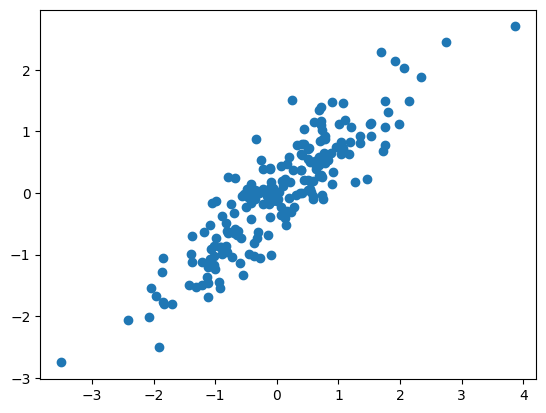

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show();



By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


#The fit learns some quantities from the data, most importantly the components and explained variance

In [8]:
print(pca.components_)

[[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]


In [9]:
print(pca.explained_variance_)

[1.82927343 0.10246373]


To see what these numbers mean, lets visualize them as vectors over the input data, using the components to define the direction of the vector and the explained variance to define the squared length of the vector

In [11]:
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    
    arrowprops = dict(arrowstyle='->',linewidth=1,color='black',
                      shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    
    
        

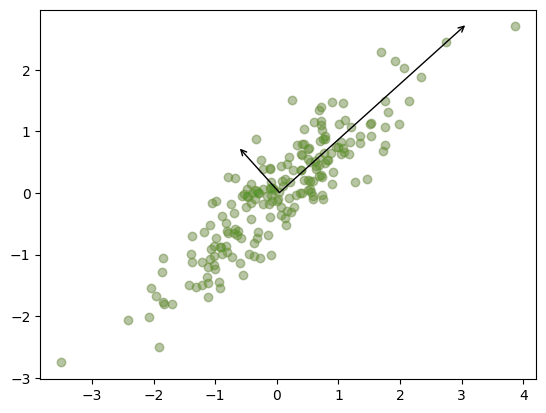

In [14]:
plt.scatter(X[:,0],X[:,1],alpha=.2)
for length, vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal');
plt.show()



These vectors represent the principal axes of the data, and the length of each vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the principal components of the data.

If we plot these principal components beside the original data, we see the plots shown in the following figure:

figure source in Appendix

This transformation from data axes to principal axes is an affine transformation, which means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.
PCA as Dimensionality Reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:


In [15]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print(f"original shape: {X.shape}")
print(f"transformed shape: {X_pca.shape}")

original shape: (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data (see the following figure):

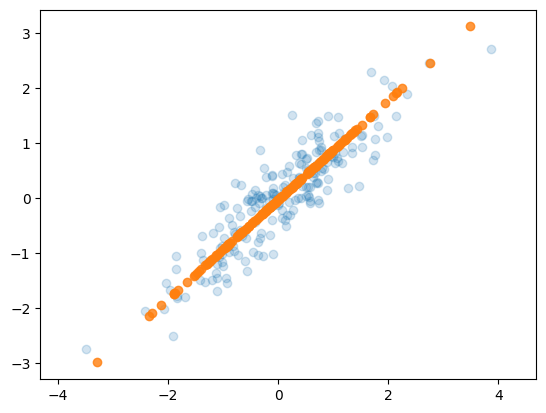

In [16]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');



The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in the preceding figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the number of data features by 50%, the overall relationships between the data points are mostly preserved.
PCA for Visualization: Handwritten Digits

The usefulness of dimensionality reduction may not be entirely apparent in only two dimensions, but it becomes clear when looking at high-dimensional data. To see this, let's take a quick look at the application of PCA to the digits dataset we worked with in In-Depth: Decision Trees and Random Forests.

We'll start by loading the data:


In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the digits dataset consists of 8 × 8–pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them into a more manageable number of dimensions, say two:

In [18]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Users\gyanr\AppData\Local\Temp\ipykernel_11996\1908297251.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('rainbow',10))


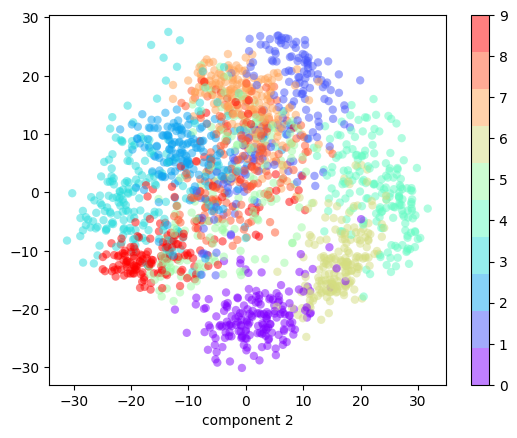

In [19]:
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5,
            c=digits.target,edgecolors='none',
            cmap=plt.cm.get_cmap('rainbow',10))
plt.xlabel('component 1')
plt.xlabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the data in two dimensions, and we have done this in an unsupervised manner—that is, without reference to the labels.

What this visualization shows:

Dimensionality Reduction: The original data has 64 dimensions (one for each pixel in an 8×8 image). PCA has identified the two directions (Component 1 and Component 2) that preserve the most variance.

Clustering: Even though the PCA didn't know which digit was which (it's an unsupervised method), it naturally grouped similar digits together. For example, zeros (usually one color) are clustered far away from ones or fours.

Orthogonality: Just like in the previous 7D and 4D examples, 'component 1' and 'component 2' are perfectly orthogonal to each other, forming the x and y axes of this plot.

![title](img1.png)


![title](img-2.png)

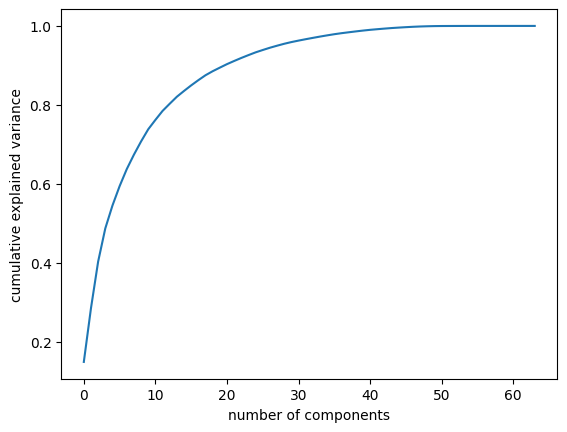

In [23]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first

components. For example, we see that with the digits data the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

This tells us that our 2-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in its features.


### PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So, if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free input samples (the following figure):


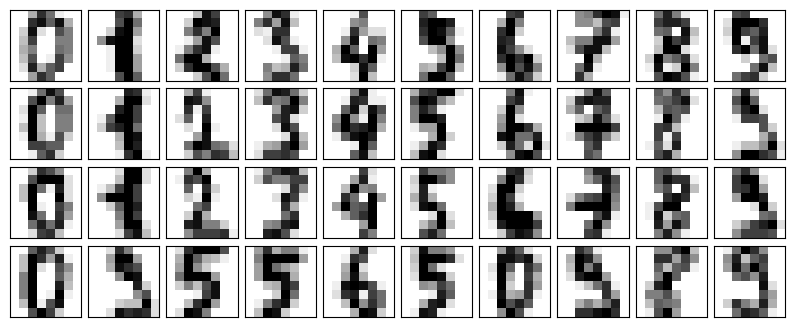

In [25]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now let's add some random noise to create a noisy dataset, and replot it (the following figure):

In [26]:
rng = np.random.default_rng(42)
rng.normal(10,2)


10.609434159508863

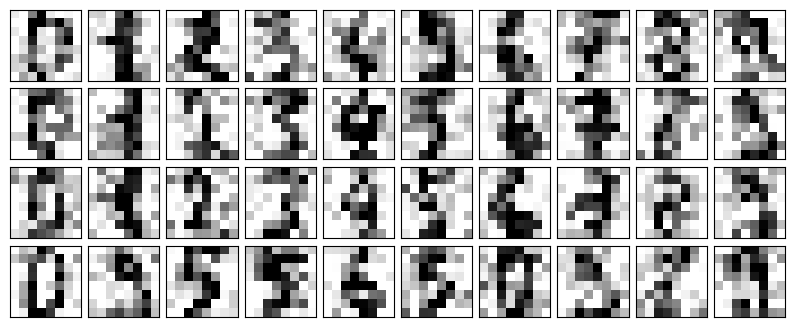

In [27]:
rng = np.random.default_rng(42)
noisy = rng.normal(digits.data,4)
plot_digits(noisy)

The visualization makes the presence of this random noise clear. Let's train a PCA model on the noisy data, requesting that the projection preserve 50% of the variance:

In [32]:
pca = PCA(.5).fit(noisy)
pca.n_components_

np.int64(12)

Here 50% of the variance amounts to 12 principal components, out of the 64 original features. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits; the following figure shows the result:

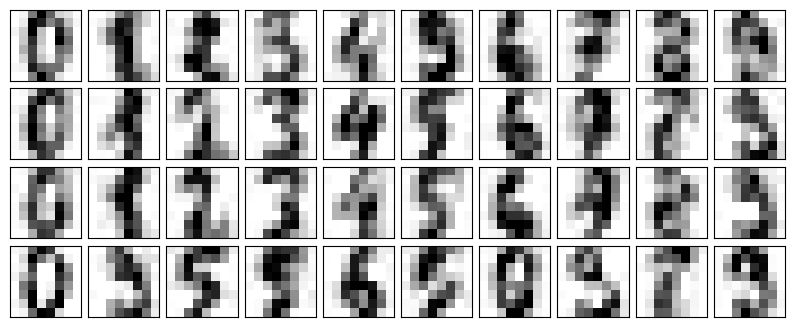

In [33]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional principal component representation, which will automatically serve to filter out random noise in the inputs.